Run this cell below to setup the notebook:

In [3]:
%%capture
!pip install --no-cache-dir shapely
!pip install -U folium

%matplotlib inline
import os
import time
import folium
from datetime import datetime
from shapely.geometry import Point, mapping
from shapely.geometry.polygon import Polygon
import matplotlib as mpl
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from datascience import *
from shapely import geometry as sg, wkt
from scripts.espm_module import *
import json
import random
from IPython.core.display import display, HTML
import ipywidgets as widgets
plt.style.use('seaborn')

# ESPM / IB 105

The goal of this notebook is to access and integrate diverse data sets to visualize correlations and discover patterns to address questions of species’ responses to environmental change. We will use programmatic tools to show how to use Berkeley resources such as the biodiversity data from biocollections and online databases, field stations, climate models, and other environmental data.

Before we begin analyzing and visualizing biodiversity data, this introductory notebook will help familiarize you with the basics of programming in Python.

## Table of Contents

0 - [Jupyter Notebooks](#jupyter)
    
1 - [Python Basics](#python basics)

2 - [GBIF API](#gbif)

3 - [Comparing California Oak Species](#oak)

4 - [Cal-Adapt API](#adapt)

# Part 0: Our Computing Environment, Jupyter notebooks  <a id='jupyter'></a>
This webpage is called a Jupyter notebook. A notebook is a place to write programs and view their results. 

### Text cells
In a notebook, each rectangle containing text or code is called a *cell*.

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to learn Markdown, but you might want to.

After you edit a text cell, click the "run cell" button at the top that looks like ▶| to confirm any changes. (Try not to delete the instructions of the lab.)

### Code cells
Other cells contain code in the Python 3 language. Running a code cell will execute all of the code it contains.

To run the code in a code cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle.  Next, either press ▶| or hold down the `shift` key and press `return` or `enter`.

Try running this cell:

In [3]:
print("Hello, World!")

Hello, World!


And this one:

In [ ]:
print("\N{WAVING HAND SIGN}, \N{EARTH GLOBE ASIA-AUSTRALIA}!")

# Part 1: Python basics <a id='python basics'></a>
Before getting into the more high level analyses we will do on the GBIF and Cal-Adapt data, we need to cover a few of the foundational elements of programming in Python.

#### A. Expressions
The departure point for all programming is the concept of the __expression__. An expression is a combination of variables, operators, and other Python elements that the language interprets and acts upon. Expressions act as a set of instructions to be fed through the interpreter, with the goal of generating specific outcomes. See below for some examples of basic expressions. Keep in mind that most of these just map to your understanding of mathematical expressions:

In [ ]:
2 + 2

'me' + ' and I'

12 ** 2

6 + 4

You will notice that only the last line in a cell gets printed out. If you want to see the values of previous expressions, you need to call the `print` function on that expression. Functions use parenthesis around their parameters, just like in math!

In [ ]:
print(2 + 2)

print('me' + ' and I')

print(12 ** 2)

print(6 + 4)

#### B. Variables
In the example below, `a` and `b` are Python objects known as __variables__. We are giving an object (in this case, an `integer` and a `float`, two Python data types) a name that we can store for later use. To use that value, we can simply type the name that we stored the value as. Variables are stored within the notebook's environment, meaning stored variable values carry over from cell to cell.

In [ ]:
a = 4
b = 10/5

Notice that when you create a variable, unlike what you previously saw with the expressions, it does not print anything out.

We can continue to perform mathematical operations on these variables, which are now placeholders for what we've assigned:

In [ ]:
print(a + b)

#### C. Lists
The following few cells will introduce the concept of __lists__.

A list is an ordered collection of objects. They allow us to store and access groups of variables and other objects for easy access and analysis. Check out this [documentation](https://www.tutorialspoint.com/python/python_lists.htm) for an in-depth look at the capabilities of lists.

To initialize a list, you use brackets. Putting objects separated by commas in between the brackets will add them to the list. 

In [ ]:
# an empty list
lst = []
print(lst)

# reassigning our empty list to a new list
lst = [1, 3, 6, 'lists', 'are' 'fun', 4]
print(lst)

To access a value in the list, put the index of the item you wish to access in brackets following the variable that stores the list. Lists in Python are zero-indexed, so the indicies for `lst` are 0, 1, 2, 3, 4, 5, and 6.

In [ ]:
# Elements are selected like this:
example = lst[2]

# The above line selects the 3rd element of lst (list indices are 0-offset) and sets it to a variable named example.
print(example)

#### D. Dictonaries

Dictionaries are `key`-`value` pairs. Just like a word dictinary, you have a key that will index a specific definition.

In [ ]:
my_dict = {'python': 'a large heavy-bodied nonvenomous constrictor snake occurring throughout the Old World tropics.'}

We can get a `value` back out by indexing the `key`:

In [ ]:
my_dict['python']

But like real dictionaries, there can be more than one definition. You can keep a `list`, or even another dictionary within a specific `key`:

In [ ]:
my_dict = {'python': ['a large heavy-bodied nonvenomous constrictor snake occurring throughout the Old World tropics.',
                      'a high-level general-purpose programming language.']}

We can index the `list` after the `key`:

In [ ]:
my_dict['python'][0]

In [ ]:
my_dict['python'][1]

---

# Part 2: GBIF API<a id='gbif'></a>

The Global Biodiversity Information Facility has created an API that we can use to get data about different species at the [GBIF Web API](http://www.gbif.org/developer/summary).

You can think of a Web API call as a fancy URL, what do you think the end of this URL means:

http://api.gbif.org/v1/occurrence/search?year=1800,1899

If you're guessing that it limits the search to the years 1800-1899, you're right! Go ahead and click the URL above. You should see something like this:

```
{"offset":0,"limit":20,"endOfRecords":false,"count":5711947,"results":[{"key":14339704,"datasetKey":"857aa892-f762-11e1-a439-00145eb45e9a","publishingOrgKey":"6bcc0290-6e76-11db-bcd5-b8a03c50a862","publishingCountry":"FR","protocol":"BIOCASE","lastCrawled":"2013-09-07T07:06:34.000+0000","crawlId":1,"extensions":{},"basisOfRecord":"OBSERVATION","taxonKey":2809968,"kingdomKey":6,"phylumKey":7707728,"classKey":196,"orderKey":1169,"familyKey":7689,"genusKey":2849312,"speciesKey":2809968,"scientificName":"Orchis militaris L.","kingdom":"Plantae","phylum":"Tracheophyta","order":"Asparagales","family":"Orchidaceae","genus":"Orchis","species":"Orchis 
```

It might look like a mess, but it's not! This is actually very structured data, and can easily be put into a table like format, though often programmers don't do this because it's just as easy to keep it as is.

You might be able to pick out the curly braces `{` and think this it's a dictionary. You'd be right, except in this format we call it [JSON](https://en.wikipedia.org/wiki/JSON).

---

## *Argia arioides*

![argia arioides](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Argia_agrioides-Male-1.jpg/220px-Argia_agrioides-Male-1.jpg)

When performing data analysis, it is always important to define a question that you seek the answer to. *The goal of finding the answer to this question will ultimately drive the queries and analysis styles you choose to use/write.*

For this example, we are going to ask: **where have [*Argia agrioides*](https://www.google.com/search?q=Argia+agrioides&rlz=1C1CHBF_enUS734US734&source=lnms&tbm=isch&sa=X&ved=0ahUKEwji9t29kNTWAhVBymMKHWJ-ANcQ_AUICygC&biw=1536&bih=694) (the California Dancer dragonfly) been documented? Are there records at any of our field stations?**

The code to ask the API has already been written for us! This is often the case with programming, someone has already written the code, so we don't have to. We'll just set up the `GBIFRequest` object and assign that to the variable `req`, short for "request":

In [4]:
req = GBIFRequest()  # creating a request to the API

Great, so how do we make searches? We can use a Python `dictionary` to create our query parameters. We'll ask for the `scientificName` of the California Dancer (*Argia arioides*):

In [5]:
params = {'scientificName': 'Argia agrioides'}  # setting our parameters (the specific species we want)

Now that we have the parameters, we can feed this to our `req` variable to get back all the pages of data. We'll then make sure that each record has a `decimalLatitude`, otherwise we'll thow it out for now. Lastly, we'll print out the first five records:

In [6]:
params = {'scientificName': 'Argia agrioides'}  # setting our parameters (the specific species we want)
pages = req.get_pages(params)  # using those parameters to complete the request
records = [rec for page in pages for rec in page['results'] if rec.get('decimalLatitude')]  # sift out valid records
records[:5]  # print first 5 records

[{'basisOfRecord': 'HUMAN_OBSERVATION',
  'catalogNumber': '6677469',
  'class': 'Insecta',
  'classKey': 216,
  'collectionCode': 'Observations',
  'coordinateUncertaintyInMeters': 400.0,
  'country': 'United States',
  'countryCode': 'US',
  'crawlId': 85,
  'datasetKey': '50c9509d-22c7-4a22-a47d-8c48425ef4a7',
  'datasetName': 'iNaturalist research-grade observations',
  'dateIdentified': '2017-06-16T06:02:28.000+0000',
  'day': 28,
  'decimalLatitude': 36.364179,
  'decimalLongitude': -120.75614,
  'eventDate': '2017-05-28T12:28:00.000+0000',
  'eventTime': '19:28:00Z',
  'extensions': {},
  'facts': [],
  'family': 'Coenagrionidae',
  'familyKey': 8577,
  'gbifID': '1571142666',
  'genericName': 'Argia',
  'genus': 'Argia',
  'genusKey': 1422607,
  'geodeticDatum': 'WGS84',
  'http://unknown.org/occurrenceDetails': 'https://www.inaturalist.org/observations/6677469',
  'identificationID': '13779767',
  'identifier': '6677469',
  'identifiers': [],
  'institutionCode': 'iNaturalist'

### DataFrames

JSON is great, but it might be conceptually easier to make this a table. We'll use the popular [`pandas`](http://pandas.pydata.org/) Python library. In `pandas`, a DataFrame is a table that has several convenient features. For example, we can access the columns of the table like we would `dict`ionaries, and we can also treat the columns and rows themselves as Python `list`s.

In [7]:
records_df = pd.read_json(json.dumps(records))  # converts the JSON above to a dataframe
records_df.head()  # prints the first five rows of the dataframe

,acceptedNameUsage,accessRights,associatedReferences,basisOfRecord,bibliographicCitation,catalogNumber,class,classKey,collectionCode,continent,...,taxonID,taxonKey,taxonRank,taxonRemarks,type,verbatimElevation,verbatimEventDate,verbatimLocality,vernacularName,year
0,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,6677469,Insecta,216,Observations,NaN,...,51220.0,5051459,SPECIES,NaN,NaN,NaN,2017/05/28 12:28 PM PDT,"San Benito County, CA, USA",NaN,2017.0
1,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,6412128,Insecta,216,Observations,NaN,...,51220.0,5051459,SPECIES,NaN,NaN,NaN,2017/05/28 10:05 AM PDT,"Stanislaus County, CA, USA",NaN,2017.0
2,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,6411712,Insecta,216,Observations,NaN,...,51220.0,5051459,SPECIES,NaN,NaN,NaN,Sun May 28 2017 10:54:32 GMT-0700 (PDT),"4713–7019 Del Puerto Canyon Rd, Patterson, CA, US",NaN,2017.0
3,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,6103690,Insecta,216,Observations,NaN,...,51220.0,5051459,SPECIES,NaN,NaN,NaN,2017/05/02 12:13 PM EDT,"San Diego, California, United States",NaN,2017.0
4,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,6340593,Insecta,216,Observations,NaN,...,51220.0,5051459,SPECIES,NaN,NaN,NaN,2017/05/13 4:03 PM PDT,"San Benito County, CA, USA",NaN,2017.0


Since each column (or row) above can be thought of as a `list`, that means we can use list functions to interact with them! One such function is the `len` function to get the number of elements in a `list`:

In [8]:
len(records_df.columns), len(records_df)

(99, 216)

So we have 99 columns and 177 rows! That's a lot of information. What variables do we have in the columns?

In [9]:
records_df.columns

Index(['acceptedNameUsage', 'accessRights', 'associatedReferences',
       'basisOfRecord', 'bibliographicCitation', 'catalogNumber', 'class',
       'classKey', 'collectionCode', 'continent',
       'coordinateUncertaintyInMeters', 'country', 'countryCode', 'county',
       'crawlId', 'datasetID', 'datasetKey', 'datasetName', 'dateIdentified',
       'day', 'decimalLatitude', 'decimalLongitude', 'dynamicProperties',
       'elevation', 'endDayOfYear', 'eventDate', 'eventTime', 'extensions',
       'facts', 'family', 'familyKey', 'gbifID', 'genericName', 'genus',
       'genusKey', 'geodeticDatum', 'georeferenceProtocol',
       'georeferenceSources', 'georeferencedBy', 'higherClassification',
       'higherGeography', 'http://unknown.org/occurrenceDetails',
       'identificationID', 'identificationRemarks', 'identifiedBy',
       'identifier', 'identifiers', 'individualCount', 'institutionCode',
       'institutionID', 'issues', 'key', 'kingdom', 'kingdomKey', 'language',
       'las

We can use two methods from `pandas` to do a lot more. The `value_counts()` method will tabulate the frequency of the row value in a column, and the `plot.barh()` will plot us a horizontal bar chart:

In [10]:
records_df['country'].value_counts()

United States    172
Mexico            44
Name: country, dtype: int64

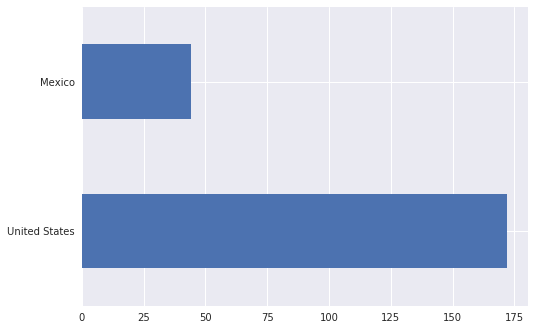

In [11]:
records_df['country'].value_counts().plot.barh()

In [ ]:
records_df['county'].value_counts().plot.barh()

In [ ]:
records_df['basisOfRecord'].value_counts().plot.barh()

In [ ]:
records_df['collectionCode'].value_counts().plot.barh()

The `groupby()` method allows us to count based one column based on another, and then color the bar chart differently depending on a variable of our choice:

In [ ]:
records_df.groupby(["collectionCode", "basisOfRecord"])['basisOfRecord'].count()

In [ ]:
records_df.groupby(["collectionCode", "basisOfRecord"])['basisOfRecord'].count().unstack().plot.barh(stacked=True)

And we can use `plot.hist()` to make a histogram:

In [ ]:
records_df['elevation'].plot.hist()

---

<div class="alert alert-info">
**Exercise**: Edit the code below to search for a different species you're interested in, then adapt some of the graphing cells above to explore your data!
</div>

In [1]:
my_req = GBIFRequest()  # creating a request to the API
my_params = {'scientificName': 'Taricha rivularis'}  # setting our parameters (the specific species we want)
my_pages = my_req.get_pages(my_params)  # using those parameters to complete the request
my_records = [rec for page in my_pages for rec in page['results'] if rec.get('decimalLatitude')]  # sift out valid records
my_records_df = pd.read_json(json.dumps(my_records))  # make a dataframe
my_records_df.head()  # print first 5 rows

NameError: name 'GBIFRequest' is not defined

In [ ]:
# graphing code here!

---

### Mapping

Now we can map our latitude and longitude points. We'll want to color code by `collectionCode` so we can see which collection made the observation or has the specimen. We'll use a function that does this automatically, but it will randomly generate a color, so if you get a lot of a similar color maybe run the cell a couple times!

In [12]:
color_dict, html_key = assign_colors(records_df, "collectionCode")
display(HTML(html_key))

collectionCode,HEX,Color
Entomology,#0FE4FB,
EMEC,#B3D897,
Observations,#4F0305,
ENT,#360838,
SDNHM,#D35DA7,
QMOR,#BD4834,
UCBME,#C175DD,


Now we can map the points!

In [13]:
mapa = folium.Map(location=[37.359276, -122.179626], zoom_start=5) # Folium is a useful library for generating
                                                                   # Google maps-like map visualizations.
for r in records_df.iterrows():
    lat = r[1]['decimalLatitude']
    long = r[1]['decimalLongitude']
    folium.CircleMarker((lat, long), color=color_dict[r[1]['collectionCode']], popup=r[1]['collectionCode']).add_to(mapa)
mapa

---

To get the boundries for all the reserves, we will need to send a request to get GeoJSON, which is a format for encoding a variety of geographic data structures. With this code, we can request GeoJSON for all reserves and plot ocurrences of the species. First we'll assign the API URL that has the data to a new variable `url`:

In [14]:
url = 'https://ecoengine.berkeley.edu/api/layers/reserves/features/'

Now we make the requests just like we did earlier through the GBIF:

In [15]:
reserves = requests.get(url, params={'page_size': 30}).json()
reserves

{'count': 27,
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [[[-118.83381629781616,
       37.61479436331852],
      [-118.82709476671964, 37.6156994690812],
      [-118.82659992313266, 37.615758366415605],
      [-118.82579670000314, 37.615795856800595],
      [-118.82593814282184, 37.614690648644796],
      [-118.82699708160196, 37.613264260296326],
      [-118.8271030468028, 37.61322646844346],
      [-118.83083008402349, 37.61223849036604],
      [-118.83611033897566, 37.61370662694019],
      [-118.83656313807192, 37.613811925323354],
      [-118.83680750510132, 37.614247069621726],
      [-118.8367083025607, 37.61468159590126],
      [-118.83636801046858, 37.61497222342867],
      [-118.83610928287084, 37.61498363929588],
      [-118.83489963311455, 37.61509505915818],
      [-118.83381629781616, 37.61479436331852]]],
    'type': 'Polygon'},
   'properties': {'layer': 'reserves',
    'name': 'Sierra Neva

If you look closely, this is just bounding boxes for the latitude and longitude of the reserves.

There are some reserves that the EcoEngine didn't catch, we'll add the information for "Blodgett", "Hopland", and "Sagehen":

In [16]:
station_urls = {
    'Blodgett': 'https://raw.githubusercontent.com/BNHM/spatial-layers/master/wkt/BlodgettForestResearchStation.wkt',
    'Hopland': 'https://raw.githubusercontent.com/BNHM/spatial-layers/master/wkt/HoplandREC.wkt',
    'Sagehen': 'https://raw.githubusercontent.com/BNHM/spatial-layers/master/wkt/SagehenCreekFieldStation.wkt'
}
reserves['features'] += [{'type': "Feature", 'properties': {"name": name}, 'geometry': mapping(wkt.loads(requests.get(url).text))}
                for name, url in station_urls.items()]

We can see all the station names by indexing the `name` value for the reserves:

In [17]:
[r['properties']['name'] for r in reserves['features']]

['Sierra Nevada Aquatic Research Lab',
 'Stebbins Cold Canyon Reserve',
 'Boyd Deep Canyon Desert Research Center',
 'Burns Piñon Ridge Reserve',
 'Steele Burnand Desert Research Center',
 'Stunt Ranch Reserve',
 'Motte Rimrock Reserve',
 'Oasis de Los Osos',
 'Quail Ridge Reserve',
 'Sacramento Mountains Reserve',
 'San Joaquin Freshwater Marsh Reserve',
 'Santa Cruz Island Reserve',
 'Sedgwick Reserve',
 'Hastings Natural History Reservation',
 'James San Jacinto Mountains Reserve',
 'Jenny Pygmy Forest Reserve',
 'Jepson Prairie Reserve',
 'Kendell-Frost Mission Bay Marsh Reserve',
 'Angelo Coast Range Reserve',
 'Blue Oak Ranch Reserve',
 'Bodega Marine Laboratory and Reserve',
 'Box Springs Reserve',
 'Carpinteria Salt Marsh Reserve',
 'McLaughlin Natural Reserve',
 'Merced Vernal Pools & Grassland Reserve',
 'Coal Oil Point Natural Reserve',
 'Younger Lagoon Reserve',
 'Blodgett',
 'Hopland',
 'Sagehen']

We can send this `geojson` directly to our mapping library `folium`. You'll have to zoom in, but you should see blue outlines areas, there are the reserves!:

In [18]:
mapb = folium.Map([37.359276, -122.179626], zoom_start=5)

points = folium.features.GeoJson(reserves)
mapb.add_child(points)
for r in records_df.iterrows():
    lat = r[1]['decimalLatitude']
    long = r[1]['decimalLongitude']
    folium.Circle((lat, long), color=color_dict[r[1]['collectionCode']]).add_to(mapb)
mapb

---

<div class="alert alert-info">
**Exercise**: Edit the code below where you see `...` to map your selection for `scientificName` from `my_records_df`
</div>

In [ ]:
color_dict, html_key = assign_colors(..., "collectionCode")
display(HTML(html_key))

In [ ]:
mapb = folium.Map([37.359276, -122.179626], zoom_start=5)

points = folium.features.GeoJson(reserves)
mapb.add_child(points)
for r in (...).iterrows():
    lat = r[1]['decimalLatitude']
    long = r[1]['decimalLongitude']
    folium.Circle((lat, long), color=color_dict[r[1]['collectionCode']]).add_to(mapb)
mapb

---

We can also find out which stations have how many *Argia Argrioides*. First we'll have to add a column to our `DataFrame` that makes points out of the latitude and longitude coordinates:

In [19]:
def make_point(row):
    return Point(row['decimalLongitude'], row['decimalLatitude'])

records_df["point"] = records_df.apply(lambda row: make_point (row),axis=1)

Now we can write a little function to check whether that point is in one of the stations, and if it is, we'll add that station in a new column called `station`:

In [20]:
def in_station(reserves, row):
    
    reserve_polygons = []

    for r in reserves['features']:
        name = r['properties']['name']
        poly = sg.shape(r['geometry'])
        reserve_polygons.append({"id": name,
                                 "geometry": poly})
    
    sid = False
    for r in reserve_polygons:
        if r['geometry'].contains(row['point']):
            sid = r['id']
            sid = r['id']
    if sid:
        return sid
    else:
        return False

Now apply this function to the `DataFrame`:

In [21]:
records_df["station"] = records_df.apply(lambda row: in_station(reserves, row),axis=1)
in_stations_df = records_df[records_df["station"] != False]
in_stations_df.head()

,acceptedNameUsage,accessRights,associatedReferences,basisOfRecord,bibliographicCitation,catalogNumber,class,classKey,collectionCode,continent,...,taxonRank,taxonRemarks,type,verbatimElevation,verbatimEventDate,verbatimLocality,vernacularName,year,point,station
75,NaN,http://vertnet.org/resources/norms.html,NaN,PRESERVED_SPECIMEN,NaN,EMEC1035822,Insecta,216,EMEC,NaN,...,SPECIES,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,POINT (-119.71461 34.00153),Santa Cruz Island Reserve
76,NaN,http://vertnet.org/resources/norms.html,NaN,PRESERVED_SPECIMEN,NaN,EMEC1035823,Insecta,216,EMEC,NaN,...,SPECIES,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,POINT (-119.71461 34.00153),Santa Cruz Island Reserve
77,NaN,http://vertnet.org/resources/norms.html,NaN,PRESERVED_SPECIMEN,NaN,EMEC1035820,Insecta,216,EMEC,NaN,...,SPECIES,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,POINT (-119.71461 34.00153),Santa Cruz Island Reserve
79,NaN,http://vertnet.org/resources/norms.html,NaN,PRESERVED_SPECIMEN,NaN,EMEC1035821,Insecta,216,EMEC,NaN,...,SPECIES,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,POINT (-119.71461 34.00153),Santa Cruz Island Reserve


Let's see if this corresponds to what we observed on the map:

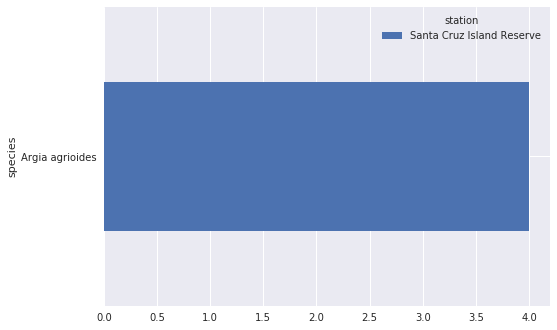

In [22]:
in_stations_df.groupby(["species", "station"])['station'].count().unstack().plot.barh(stacked=True)

---

# Part 3: Comparing California Oak species:<a id='oak'></a>


| ![quercus douglassi](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Large_Blue_Oak.jpg/220px-Large_Blue_Oak.jpg)  | ![quercus lobata](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Valley_Oak_Mount_Diablo.jpg/220px-Valley_Oak_Mount_Diablo.jpg) | ![quercus durata](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Quercusduratadurata.jpg/220px-Quercusduratadurata.jpg) | ![quercus agrifolia](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Quercus_agrifolia_foliage.jpg/220px-Quercus_agrifolia_foliage.jpg) |
|:---:|:---:|:---:|:---:|
| *Quercus douglassi* | *Quercus lobata* | *Quercus durata* | *Quercus agrifolia*|


Let's search for these different species of oak using our `GBIF` API and collect the observations:

In [23]:
species_records = []

species = ["Quercus douglassi", "Quercus lobata", "Quercus durata", "Quercus agrifolia"]

for s in species:
    req = GBIFRequest()  # creating a request to the API
    params = {'scientificName': s}  # setting our parameters (the specific species we want)
    pages = req.get_pages(params)  # using those parameters to complete the request
    records = [rec for page in pages for rec in page['results'] if rec.get('decimalLatitude')]  # sift out valid records
    species_records.extend(records)
    time.sleep(3)

We can convert this JSON to a `DataFrame` again:

In [24]:
records_df = pd.read_json(json.dumps(species_records))
records_df.head()

,accessRights,basisOfRecord,bibliographicCitation,catalogNumber,class,classKey,collectionCode,collectionID,continent,coordinateUncertaintyInMeters,...,stateProvince,taxonID,taxonKey,taxonRank,type,verbatimElevation,verbatimEventDate,verbatimLocality,verbatimTaxonRank,year
0,NaN,HUMAN_OBSERVATION,NaN,4936433,Magnoliopsida,220,Observations,NaN,NaN,8.0,...,NaN,49011.0,2878373,SPECIES,NaN,NaN,2017/01/08 4:20 PM PST,"1447-, 1601 Maricopa Hwy, Ojai, CA 93023, USA",NaN,2017
1,NaN,HUMAN_OBSERVATION,NaN,4975245,Magnoliopsida,220,Observations,NaN,NaN,NaN,...,NaN,49011.0,2878373,SPECIES,NaN,NaN,Sun Jan 15 2017 16:00:54 GMT-0800 (PST),"100 Gateway Blvd, Orinda, CA, US",NaN,2017
2,NaN,HUMAN_OBSERVATION,NaN,5140295,Magnoliopsida,220,Observations,NaN,NaN,5.0,...,NaN,49011.0,2878373,SPECIES,NaN,NaN,Sat Feb 18 2017 13:44:17 GMT-0800 (PST),"Diablo Foothills Regional Park, Walnut Creek, ...",NaN,2017
3,NaN,HUMAN_OBSERVATION,NaN,5098048,Magnoliopsida,220,Observations,NaN,NaN,NaN,...,NaN,49011.0,2878373,SPECIES,NaN,NaN,Sun Feb 12 2017 11:22:54 GMT-0800 (PST),"93292, Visalia, CA, US",NaN,2017
4,NaN,HUMAN_OBSERVATION,NaN,5097101,Magnoliopsida,220,Observations,NaN,NaN,NaN,...,NaN,49011.0,2878373,SPECIES,NaN,NaN,Sun Feb 12 2017 10:47:48 GMT-0800 (PST),"93292, Visalia, CA, US",NaN,2017


How many records do we have now?

In [25]:
len(records_df)

1446

Let's see how they're distributed among our different species queries:

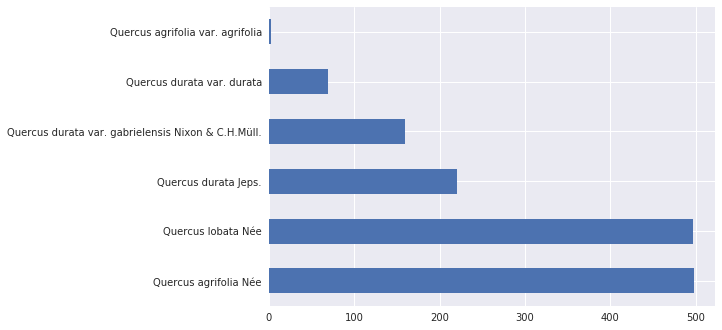

In [26]:
records_df['scientificName'].value_counts().plot.barh()

We can group this again by `collectionCode`:

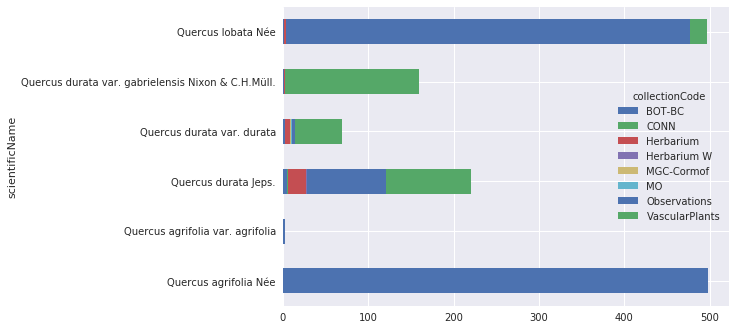

In [27]:
records_df.groupby(["scientificName", "collectionCode"])['collectionCode'].count().unstack().plot.barh(stacked=True)

We can also map these like we did with the *Argia arioides* above:

In [28]:
color_dict, html_key = assign_colors(records_df, "scientificName")
display(HTML(html_key))

scientificName,HEX,Color
Quercus agrifolia var. agrifolia,#CE2D5C,
Quercus durata var. durata,#FC64AA,
Quercus durata Jeps.,#9F122F,
Quercus lobata Née,#5DD10D,
Quercus durata var. gabrielensis Nixon & C.H.Müll.,#792951,
Quercus agrifolia Née,#2B7940,


In [29]:
mapc = folium.Map([37.359276, -122.179626], zoom_start=5)

points = folium.features.GeoJson(reserves)
mapc.add_child(points)
for r in records_df.iterrows():
    lat = r[1]['decimalLatitude']
    long = r[1]['decimalLongitude']
    folium.Circle((lat, long), color=color_dict[r[1]['scientificName']]).add_to(mapc)
mapc

We can use the same code we wrote earlier to see which reserves have which species of oak:

In [30]:
records_df["point"] = records_df.apply(lambda row: make_point (row),axis=1)
records_df["station"] = records_df.apply(lambda row: in_station(reserves, row),axis=1)
in_stations_df = records_df[records_df["station"] != False]
in_stations_df.head()

,accessRights,basisOfRecord,bibliographicCitation,catalogNumber,class,classKey,collectionCode,collectionID,continent,coordinateUncertaintyInMeters,...,taxonKey,taxonRank,type,verbatimElevation,verbatimEventDate,verbatimLocality,verbatimTaxonRank,year,point,station
126,NaN,HUMAN_OBSERVATION,NaN,6486683,Magnoliopsida,220,Observations,NaN,NaN,5.0,...,2878373,SPECIES,NaN,NaN,2017-06-03 2:15:10 PM PDT,"Lake County, UCNRS, US-CA, US",NaN,2017,POINT (-122.415006 38.861607),McLaughlin Natural Reserve
400,NaN,HUMAN_OBSERVATION,NaN,2188360,Magnoliopsida,220,Observations,NaN,NaN,194.0,...,2878373,SPECIES,NaN,NaN,2015-10-17,Sedgwick Reserve,NaN,2015,POINT (-120.040642 34.692806),Sedgwick Reserve
408,NaN,HUMAN_OBSERVATION,NaN,511107,Magnoliopsida,220,Observations,NaN,NaN,NaN,...,2878373,SPECIES,NaN,NaN,Sat Jan 25 2014 11:27:06 GMT-0800 (PST),"23100 Alum Rock Falls Rd, San Jose, CA, US",NaN,2014,POINT (-121.747895 37.382145),Blue Oak Ranch Reserve
410,NaN,HUMAN_OBSERVATION,NaN,511134,Magnoliopsida,220,Observations,NaN,NaN,5.0,...,2878373,SPECIES,NaN,NaN,Sat Jan 25 2014 11:26:01 GMT-0800 (PST),NaN,NaN,2014,POINT (-121.747941 37.38195),Blue Oak Ranch Reserve
441,NaN,HUMAN_OBSERVATION,NaN,800705,Magnoliopsida,220,Observations,NaN,NaN,5.0,...,2878373,SPECIES,NaN,NaN,Thu Jul 24 2014 16:40:10 GMT-0700 (PDT),"95035, Milpitas, CA, US",NaN,2014,POINT (-121.732671 37.389495),Blue Oak Ranch Reserve


Now we can make a bar graph like we did before, grouping by `species` and stacking the bar based on `station`:

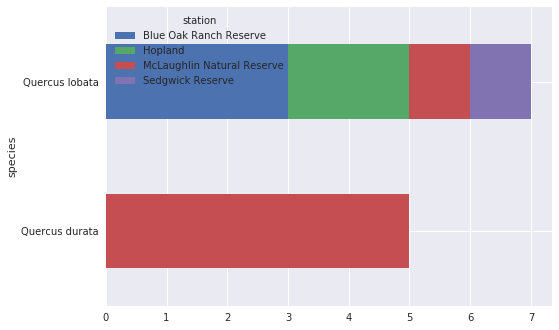

In [31]:
in_stations_df.groupby(["species", "station"])['station'].count().unstack().plot.barh(stacked=True)

---

# Part 3: Cal-Adapt API<a id='adapt'></a>

Let's get back the data from *Argia agrioides* with the GBIF API:

In [32]:
req = GBIFRequest()  # creating a request to the API
params = {'scientificName': 'Argia agrioides'}  # setting our parameters (the specific species we want)
pages = req.get_pages(params)  # using those parameters to complete the request
records = [rec for page in pages for rec in page['results'] if rec.get('decimalLatitude')]  # sift out valid records
records[:5]  # print first 5 records

[{'basisOfRecord': 'HUMAN_OBSERVATION',
  'catalogNumber': '6677469',
  'class': 'Insecta',
  'classKey': 216,
  'collectionCode': 'Observations',
  'coordinateUncertaintyInMeters': 400.0,
  'country': 'United States',
  'countryCode': 'US',
  'crawlId': 85,
  'datasetKey': '50c9509d-22c7-4a22-a47d-8c48425ef4a7',
  'datasetName': 'iNaturalist research-grade observations',
  'dateIdentified': '2017-06-16T06:02:28.000+0000',
  'day': 28,
  'decimalLatitude': 36.364179,
  'decimalLongitude': -120.75614,
  'eventDate': '2017-05-28T12:28:00.000+0000',
  'eventTime': '19:28:00Z',
  'extensions': {},
  'facts': [],
  'family': 'Coenagrionidae',
  'familyKey': 8577,
  'gbifID': '1571142666',
  'genericName': 'Argia',
  'genus': 'Argia',
  'genusKey': 1422607,
  'geodeticDatum': 'WGS84',
  'http://unknown.org/occurrenceDetails': 'https://www.inaturalist.org/observations/6677469',
  'identificationID': '13779767',
  'identifier': '6677469',
  'identifiers': [],
  'institutionCode': 'iNaturalist'

We'll make a `DataFrame` again for later use:

In [33]:
records_df = pd.read_json(json.dumps(records))
records_df.head()

,acceptedNameUsage,accessRights,associatedReferences,basisOfRecord,bibliographicCitation,catalogNumber,class,classKey,collectionCode,continent,...,taxonID,taxonKey,taxonRank,taxonRemarks,type,verbatimElevation,verbatimEventDate,verbatimLocality,vernacularName,year
0,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,6677469,Insecta,216,Observations,NaN,...,51220.0,5051459,SPECIES,NaN,NaN,NaN,2017/05/28 12:28 PM PDT,"San Benito County, CA, USA",NaN,2017.0
1,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,6412128,Insecta,216,Observations,NaN,...,51220.0,5051459,SPECIES,NaN,NaN,NaN,2017/05/28 10:05 AM PDT,"Stanislaus County, CA, USA",NaN,2017.0
2,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,6411712,Insecta,216,Observations,NaN,...,51220.0,5051459,SPECIES,NaN,NaN,NaN,Sun May 28 2017 10:54:32 GMT-0700 (PDT),"4713–7019 Del Puerto Canyon Rd, Patterson, CA, US",NaN,2017.0
3,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,6103690,Insecta,216,Observations,NaN,...,51220.0,5051459,SPECIES,NaN,NaN,NaN,2017/05/02 12:13 PM EDT,"San Diego, California, United States",NaN,2017.0
4,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,6340593,Insecta,216,Observations,NaN,...,51220.0,5051459,SPECIES,NaN,NaN,NaN,2017/05/13 4:03 PM PDT,"San Benito County, CA, USA",NaN,2017.0


Now we will use the [Cal-Adapt](http://api.cal-adapt.org/api/) web API to work with time series raster data. It will request an entire time series for any geometry and return a Pandas `DataFrame` object for each record in all of our *Argia agrioides* records:

In [34]:
req = CalAdaptRequest()
records_g = [dict(rec, geometry=sg.Point(rec['decimalLongitude'], rec['decimalLatitude']))
             for rec in records]
ca_df = req.concat_features(records_g, 'gbifID')

Let's look at the first five rows:

In [35]:
ca_df.head()

,1571142666,1563433153,1563433048,1562896608,1562977120,1571179498,1586097943,1572369781,1572369826,1586126865,...,1061059858,1061059696,1061059730,1061059770,1061001125,1061001078,1061059778,1061059789,1061000979,1061059774
event,,,,,,,,,,,,,,,,,,,,,
2006-01-01,71.008046,72.489277,73.847572,78.857228,70.201429,75.962330,72.749763,69.956215,69.956215,67.509889,...,77.090681,80.577632,80.753413,80.753413,80.577632,87.897877,73.969795,73.969795,89.505287,87.280830
2007-01-01,72.667750,74.445613,75.677729,79.330189,71.814772,76.312300,73.273427,72.257191,72.257191,67.063185,...,78.010127,81.741414,81.411824,81.411824,81.741414,89.856190,74.113551,74.113551,91.178779,88.969648
2008-01-01,70.832649,72.665828,74.108387,78.408162,69.931605,75.336604,71.660743,71.089564,71.089564,66.507441,...,77.035365,80.627070,80.485237,80.485237,80.627070,89.111207,73.295070,73.295070,90.539430,88.159517
2009-01-01,73.409547,75.017506,76.420955,80.740065,72.607545,76.983455,74.750483,72.348048,72.348048,69.083241,...,78.982197,82.010469,81.962513,81.962513,82.010469,89.773958,75.344459,75.344459,91.522542,89.172786
2010-01-01,71.921833,73.706837,75.188234,78.364930,71.047651,75.252943,73.666243,70.575789,70.575789,67.945002,...,76.513459,79.913234,80.071052,80.071052,79.913234,87.770710,73.739906,73.739906,89.758522,87.150917


This looks like the time series data we want for each record (the unique ID numbers as the columns). Each record has the projected temperature in Fahrenheit for 170 years (every row!). We can plot predictions for few random records:

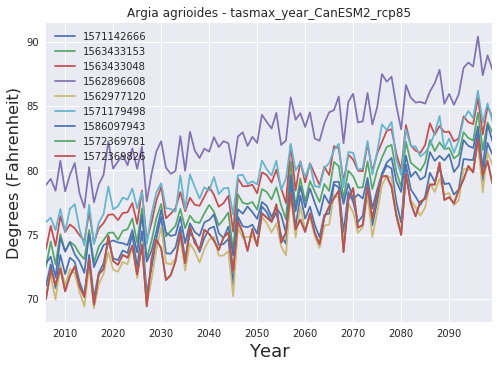

In [36]:
# Make a line plot using the first 9 columns of df.
ca_df.iloc[:,:9].plot()

# Use matplotlib to title your plot.
plt.title('Argia agrioides - %s' % req.slug)

# Use matplotlib to add labels to the x and y axes of your plot.
plt.xlabel('Year', fontsize=18)
plt.ylabel('Degrees (Fahrenheit)', fontsize=16)

It looks like temperature is increasing across the board wherever these observations are occuring. We can calculate the average temperature for each year across observations in California:

In [37]:
tmax_means = ca_df.mean(axis=1)
tmax_means

event
2006-01-01    72.972848
2007-01-01    74.196760
2008-01-01    72.733831
2009-01-01    75.004998
2010-01-01    73.400116
2011-01-01    74.476371
2012-01-01    74.286241
2013-01-01    73.353948
2014-01-01    72.455297
2015-01-01    75.188729
2016-01-01    72.463941
2017-01-01    73.987735
2018-01-01    74.545526
2019-01-01    75.699385
2020-01-01    74.966682
2021-01-01    74.841690
2022-01-01    75.248128
2023-01-01    75.162120
2024-01-01    76.269487
2025-01-01    74.347918
2026-01-01    76.719579
2027-01-01    72.841299
2028-01-01    74.404811
2029-01-01    76.080347
2030-01-01    77.207512
2031-01-01    75.065626
2032-01-01    74.928302
2033-01-01    75.294765
2034-01-01    76.974190
2035-01-01    74.992347
                ...    
2070-01-01    79.597067
2071-01-01    78.392443
2072-01-01    78.688812
2073-01-01    80.253588
2074-01-01    78.024018
2075-01-01    79.659446
2076-01-01    81.010724
2077-01-01    81.507260
2078-01-01    81.704286
2079-01-01    79.671946
2080-01-01

What's happening to the average temperature that *Argia agrioides* is going to experience in the coming years across California?

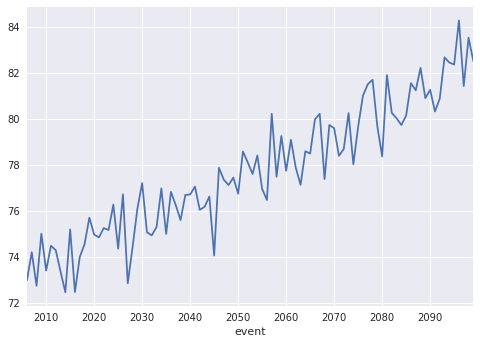

In [38]:
tmax_means.plot()

Is there a temperature at which the *Argia agrioides* cannot survive? Is there one in which they particularly thrive?

---

What if we look specifically at the field stations and reserves? We can grab our same code that checked whether a record was within a station, and then map those `gbifID`s back to this temperature dataset:

In [39]:
records_df["point"] = records_df.apply(lambda row: make_point (row),axis=1)
records_df["station"] = records_df.apply(lambda row: in_station(reserves, row),axis=1)
in_stations_df = records_df[records_df["station"] != False]
in_stations_df[['gbifID', 'station']].head()

,gbifID,station
75,1563122553,Santa Cruz Island Reserve
76,1563122601,Santa Cruz Island Reserve
77,1563122621,Santa Cruz Island Reserve
79,1563122586,Santa Cruz Island Reserve


Recall the column headers of our `ca_df` are the `gbifID`:

In [40]:
ca_df.head()

,1571142666,1563433153,1563433048,1562896608,1562977120,1571179498,1586097943,1572369781,1572369826,1586126865,...,1061059858,1061059696,1061059730,1061059770,1061001125,1061001078,1061059778,1061059789,1061000979,1061059774
event,,,,,,,,,,,,,,,,,,,,,
2006-01-01,71.008046,72.489277,73.847572,78.857228,70.201429,75.962330,72.749763,69.956215,69.956215,67.509889,...,77.090681,80.577632,80.753413,80.753413,80.577632,87.897877,73.969795,73.969795,89.505287,87.280830
2007-01-01,72.667750,74.445613,75.677729,79.330189,71.814772,76.312300,73.273427,72.257191,72.257191,67.063185,...,78.010127,81.741414,81.411824,81.411824,81.741414,89.856190,74.113551,74.113551,91.178779,88.969648
2008-01-01,70.832649,72.665828,74.108387,78.408162,69.931605,75.336604,71.660743,71.089564,71.089564,66.507441,...,77.035365,80.627070,80.485237,80.485237,80.627070,89.111207,73.295070,73.295070,90.539430,88.159517
2009-01-01,73.409547,75.017506,76.420955,80.740065,72.607545,76.983455,74.750483,72.348048,72.348048,69.083241,...,78.982197,82.010469,81.962513,81.962513,82.010469,89.773958,75.344459,75.344459,91.522542,89.172786
2010-01-01,71.921833,73.706837,75.188234,78.364930,71.047651,75.252943,73.666243,70.575789,70.575789,67.945002,...,76.513459,79.913234,80.071052,80.071052,79.913234,87.770710,73.739906,73.739906,89.758522,87.150917


Now we subset the temperature dataset for only the observations that occurr within the bounds of a reserve or field station:

In [41]:
station_obs = [str(id) for id in list(in_stations_df['gbifID'])]
ca_df[station_obs]

,1563122553,1563122601,1563122621,1563122586
event,,,,
2006-01-01,70.582435,70.582435,70.582435,70.582435
2007-01-01,70.557002,70.557002,70.557002,70.557002
2008-01-01,69.621132,69.621132,69.621132,69.621132
2009-01-01,71.966932,71.966932,71.966932,71.966932
2010-01-01,70.350020,70.350020,70.350020,70.350020
2011-01-01,71.291493,71.291493,71.291493,71.291493
2012-01-01,71.597957,71.597957,71.597957,71.597957
2013-01-01,69.142292,69.142292,69.142292,69.142292
2014-01-01,68.281514,68.281514,68.281514,68.281514


Let's graph these observations from Santa Cruz Island against the average temperature across California where this species was observed:

In [1]:
plt.plot(tmax_means, label="CA")
plt.plot(ca_df[station_obs], label="reserve")

# Use matplotlib to title your plot.
plt.title('Argia agrioides and temperatures in Santa Cruz Island')

# Use matplotlib to add labels to the x and y axes of your plot.
plt.xlabel('Year', fontsize=18)
plt.ylabel('Degrees (Fahrenheit)', fontsize=16)
plt.legend(["CA Average", "Santa Cruz Island"])

NameError: name 'plt' is not defined

What does this tell you about Santa Cruz Island? As time goes on and the temperature increases, might Santa Cruz Island serve as a refuge for *Argia agrioides*?